# Machine Learning | Handling Missing Data, Outliers, & Transformations

### Imports

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score
import warnings
warnings.filterwarnings('ignore')

In [96]:
PATH_CSV ='/home/ramses2099/Sources/IAProject/machine_learning/data/Housing2.csv'
df = pd.read_csv(PATH_CSV)

In [97]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [98]:
# change colums lower case to upper case
df.columns =df.columns.str.upper()
df.columns
# list of columns
# ['PRICE', 'AREA', 'BEDROOMS', 'BATHROOMS', 'STORIES', 'MAINROAD',
#       'GUESTROOM', 'BASEMENT', 'HOTWATERHEATING', 'AIRCONDITIONING',
#       'PARKING', 'PREFAREA', 'FURNISHINGSTATUS']

Index(['PRICE', 'AREA', 'BEDROOMS', 'BATHROOMS', 'STORIES', 'MAINROAD',
       'GUESTROOM', 'BASEMENT', 'HOTWATERHEATING', 'AIRCONDITIONING',
       'PARKING', 'PREFAREA', 'FURNISHINGSTATUS'],
      dtype='str')

In [99]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PRICE             545 non-null    int64
 1   AREA              545 non-null    int64
 2   BEDROOMS          545 non-null    int64
 3   BATHROOMS         545 non-null    int64
 4   STORIES           545 non-null    int64
 5   MAINROAD          545 non-null    str  
 6   GUESTROOM         545 non-null    str  
 7   BASEMENT          545 non-null    str  
 8   HOTWATERHEATING   545 non-null    str  
 9   AIRCONDITIONING   545 non-null    str  
 10  PARKING           545 non-null    int64
 11  PREFAREA          545 non-null    str  
 12  FURNISHINGSTATUS  545 non-null    str  
dtypes: int64(6), str(7)
memory usage: 55.5 KB


In [100]:
# SPLIT COLUMNS CATEGROICAL AND NUMERICAL
CATEGORICAL_COLUMNS = df.select_dtypes(include='str').columns.to_list()
NUMERICAL_COLUMNS = df.select_dtypes(exclude='str').columns.to_list()

In [101]:
print("Null values:")
df.isnull().sum()

Null values:


PRICE               0
AREA                0
BEDROOMS            0
BATHROOMS           0
STORIES             0
MAINROAD            0
GUESTROOM           0
BASEMENT            0
HOTWATERHEATING     0
AIRCONDITIONING     0
PARKING             0
PREFAREA            0
FURNISHINGSTATUS    0
dtype: int64

### Transform and Label Encode

In [102]:
df_final = df.copy()

yes_or_no ={'yes':1, 'no':0 }
furnished = {'furnished':1, 'semi-furnished':2, 'unfurnished':0 }

for col in CATEGORICAL_COLUMNS[:-1]:
    df_final[col] = df_final[col].map(yes_or_no)

df_final['FURNISHINGSTATUS'] = df_final['FURNISHINGSTATUS'].map(furnished)

df_final[CATEGORICAL_COLUMNS].head()

,MAINROAD,GUESTROOM,BASEMENT,HOTWATERHEATING,AIRCONDITIONING,PREFAREA,FURNISHINGSTATUS
0,1,0,0,0,1,1,1
1,1,0,0,0,1,0,1
2,1,0,1,0,0,1,2
3,1,0,1,0,1,1,1
4,1,1,1,0,1,0,1


In [103]:
df_final.describe()

,PRICE,AREA,BEDROOMS,BATHROOMS,STORIES,MAINROAD,GUESTROOM,BASEMENT,HOTWATERHEATING,AIRCONDITIONING,PARKING,PREFAREA,FURNISHINGSTATUS
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [115]:
df_final.corr()

,PRICE,AREA,BEDROOMS,BATHROOMS,STORIES,MAINROAD,GUESTROOM,BASEMENT,HOTWATERHEATING,AIRCONDITIONING,PARKING,PREFAREA,FURNISHINGSTATUS
PRICE,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.190086
AREA,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.081367
BEDROOMS,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
BATHROOMS,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
STORIES,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
MAINROAD,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
GUESTROOM,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
BASEMENT,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
HOTWATERHEATING,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
AIRCONDITIONING,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


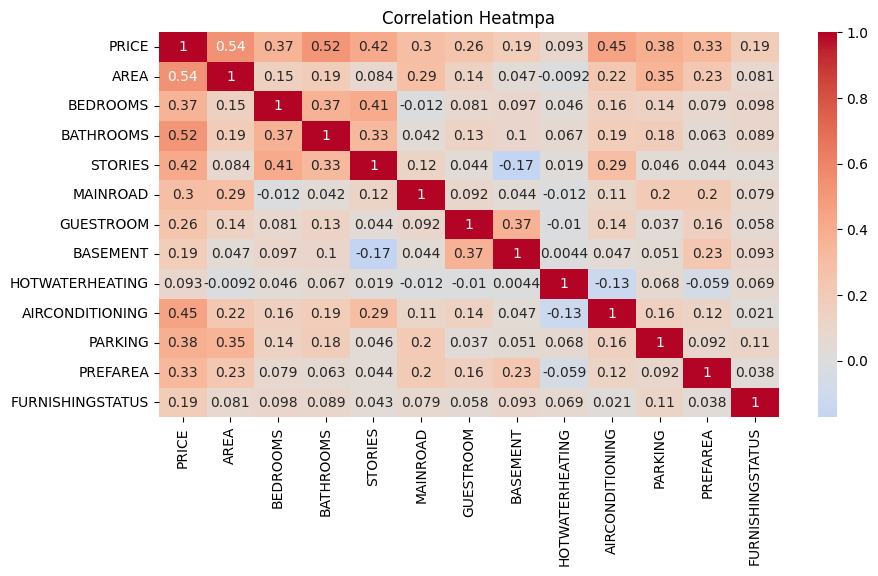

In [116]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    df_final.corr(),
    annot=True,
    cmap="coolwarm",
    center=0)
plt.title("Correlation Heatmpa")
plt.show()

In [124]:
# Correlation with target
corr_with_taget = df_final.corr()['PRICE'].sort_values(ascending=False)
print("\nCorrelation with target:")
print(corr_with_taget)


Correlation with target:
PRICE               1.000000
AREA                0.535997
BATHROOMS           0.517545
AIRCONDITIONING     0.452954
STORIES             0.420712
PARKING             0.384394
BEDROOMS            0.366494
PREFAREA            0.329777
MAINROAD            0.296898
GUESTROOM           0.255517
FURNISHINGSTATUS    0.190086
BASEMENT            0.187057
HOTWATERHEATING     0.093073
Name: PRICE, dtype: float64


### PCA Person

,PRICE,AREA,BEDROOMS,BATHROOMS,STORIES,MAINROAD,GUESTROOM,BASEMENT,HOTWATERHEATING,AIRCONDITIONING,PARKING,PREFAREA,FURNISHINGSTATUS
PRICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AREA,0.535997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEDROOMS,0.366494,0.151858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BATHROOMS,0.517545,0.193820,0.373930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STORIES,0.420712,0.083996,0.408564,0.326165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAINROAD,0.296898,0.288874,-0.012033,0.042398,0.121706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GUESTROOM,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASEMENT,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,NaN,NaN,NaN,NaN,NaN,NaN
HOTWATERHEATING,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,NaN,NaN,NaN,NaN,NaN
AIRCONDITIONING,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,NaN,NaN,NaN,NaN


Time taken: 0.00 seconds


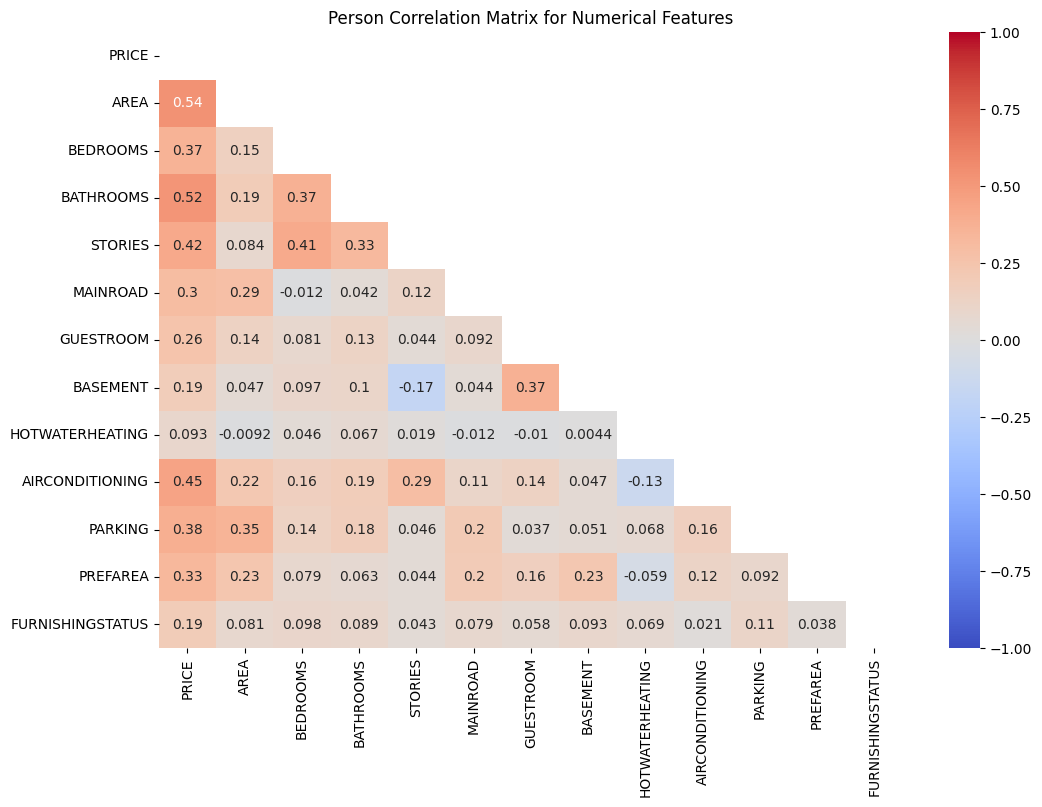

In [ ]:
import time
start_t = time.time()
corr_matrix = df_final.corr(method='pearson')
corr_matrix = corr_matrix.mask(np.triu(np.ones_like(corr_matrix, dtype=bool)))
end_t = time.time()
display(corr_matrix)
print(f"Time taken: {end_t - start_t:.2f} seconds")

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Person Correlation Matrix for Numerical Features')
plt.show()



In [104]:
y = df_final['PRICE']
X = df_final.drop('PRICE', axis=1)

### Split data in 80% train 20% test

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [106]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     75.54
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           3.69e-97
Time:                        12:23:01   Log-Likelihood:                -6638.1
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     423   BIC:                         1.336e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.53e+05   2.49e+05     -0.615      0.539   -6.42e+05    3.36e+05
AREA               237.3595     25.029      9.483      0.000     188.163     286.556
BEDROOMS          7.424e+04   7.58e+04      0.980      0.328   -7.47e+04    2.23e+05
BATHROOMS         1.099e+06   1.15e+05      9.552      0.000    8.73e+05    1.32e+06
STORIES           4.228e+05   6.89e+04      6.137      0.000    2.87e+05    5.58e+05
MAINROAD          3.996e+05   1.49e+05      2.673      0.008    1.06e+05    6.93e+05
GUESTROOM         2.364e+05   1.41e+05      1.673      0.095   -4.14e+04    5.14e+05
BASEMENT          4.138e+05   1.18e+05      3.514      0.000    1.82e+05    6.45e+05
HOTWATERHEATING   6.962e+05   2.24e+05      3.106      0.002    2.56e+05    1.14e+06
AIRCONDITIONING   8.146e+05   1.17e+05      6.958      0.000    5.84e+05    1.04e+06
PARKING           2.378e+05   6.19e+04      3.844      0.000    1.16e+05    3.59e+05
PREFAREA          6.344e+05   1.22e+05      5.215      0.000    3.95e+05    8.74e+05
FURNISHINGSTATUS  1.269e+05   5.72e+04      2.217      0.027    1.44e+04    2.39e+05
==============================================================================
Omnibus:                       75.711   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.868
Skew:                           0.843   Prob(JB):                     2.41e-44
Kurtosis:                       5.865   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
X_test = sm.add_constant(X_test)
ypred = model.predict(X_test)
print(ypred)

316    5.239173e+06
77     7.054068e+06
360    3.129424e+06
90     4.668933e+06
493    3.057759e+06
           ...     
15     5.055402e+06
357    4.098018e+06
39     7.162800e+06
54     6.479294e+06
155    6.188358e+06
Length: 109, dtype: float64


In [108]:
def evaluate_model(y_true, y_pred, dataset_type="Training"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    explain_var = explained_variance_score(y_true, y_pred)
    print(f"{dataset_type} Set Performace:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R^2): {r2:.2f}")
    print(f"Explained Variance Score: {explain_var:.2f}\n")
    
evaluate_model(y_test, ypred, dataset_type="Testing")

Testing Set Performace:
Mean Squared Error (MSE): 1747758260816.22
Mean Absolute Error (MAE): 956660.38
R-squared (R^2): 0.65
Explained Variance Score: 0.66



In [109]:
df_result = pd.DataFrame({'Actual':y_test,'Predict':ypred})
df_result['Error'] = df_result['Actual'] - df_result['Predict']
df_result['Error'] = df_result['Error'].abs()
df_result

,Actual,Predict,Error
316,4060000,5.239173e+06,1.179173e+06
77,6650000,7.054068e+06,4.040676e+05
360,3710000,3.129424e+06,5.805765e+05
90,6440000,4.668933e+06,1.771067e+06
493,2800000,3.057759e+06,2.577586e+05
...,...,...,...
15,9100000,5.055402e+06,4.044598e+06
357,3773000,4.098018e+06,3.250175e+05
39,7910000,7.162800e+06,7.472001e+05
54,7350000,6.479294e+06,8.707061e+05


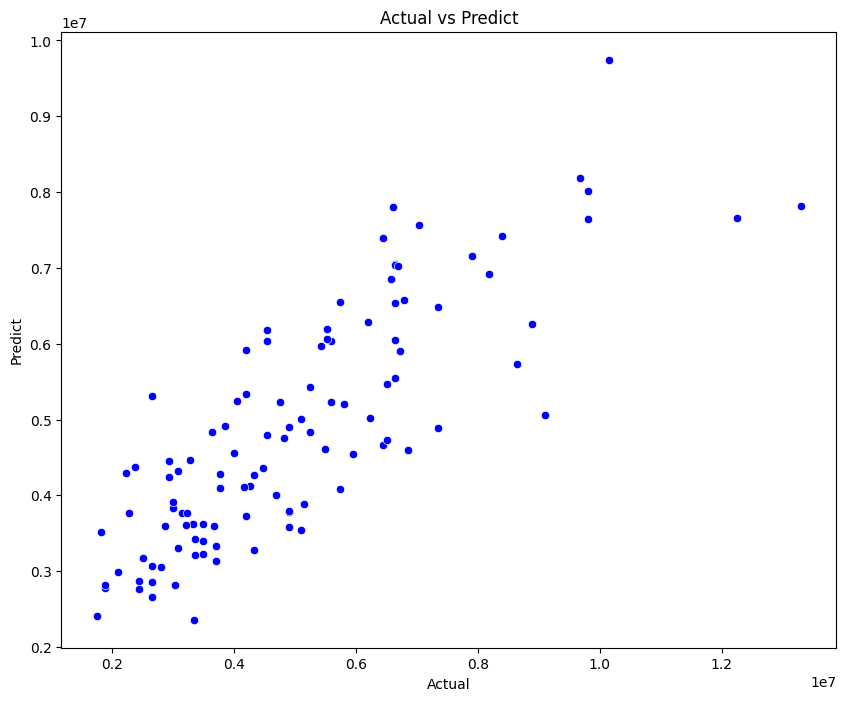

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_result['Actual'], y=df_result['Predict'], color='blue')
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.title('Actual vs Predict')
plt.show()

In [134]:
# X = sm.add_constant(X_train[])
# model = sm.OLS(y_train, X).fit()
# model.summary()

# 'AREA','BATHROOMS','STORIES','AIRCONDITIONING'
features= ['AREA']
X = sm.add_constant(X_train[features])
model = sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           1.75e-33
Time:                        13:32:23   Log-Likelihood:                -6814.6
No. Observations:                 436   AIC:                         1.363e+04
Df Residuals:                     434   BIC:                         1.364e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.512e+06   1.81e+05     13.847      0.000    2.16e+06    2.87e+06
AREA         425.7298     32.371     13.151      0.000     362.106     489.354
==============================================================================
Omnibus:                       78.264   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.475
Skew:                           0.978   Prob(JB):                     1.05e-34
Kurtosis:                       5.187   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
features= ['AREA','BATHROOMS']
X_test = sm.add_constant(X_test[features])
ypred = model.predict(X_test)
print(ypred)

316    6.170893e+06
77     6.384029e+06
360    3.875965e+06
90     4.216982e+06
493    3.847547e+06
           ...     
15     4.572208e+06
357    4.902567e+06
39     6.206416e+06
54     6.206416e+06
155    6.241938e+06
Length: 109, dtype: float64


In [132]:
evaluate_model(y_test, ypred, dataset_type="Testing")

Testing Set Performace:
Mean Squared Error (MSE): 2885313513570.46
Mean Absolute Error (MAE): 1295658.15
R-squared (R^2): 0.43
Explained Variance Score: 0.43



In [133]:
df_result = pd.DataFrame({'Actual':y_test,'Predict':ypred})
df_result['Error'] = df_result['Actual'] - df_result['Predict']
df_result['Error'] = df_result['Error'].abs()
df_result

,Actual,Predict,Error
316,4060000,6.170893e+06,2.110893e+06
77,6650000,6.384029e+06,2.659713e+05
360,3710000,3.875965e+06,1.659653e+05
90,6440000,4.216982e+06,2.223018e+06
493,2800000,3.847547e+06,1.047547e+06
...,...,...,...
15,9100000,4.572208e+06,4.527792e+06
357,3773000,4.902567e+06,1.129567e+06
39,7910000,6.206416e+06,1.703584e+06
54,7350000,6.206416e+06,1.143584e+06
